In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('results/Color Accuracy Results.csv')

In [19]:
df[['Convolution Layers', 'Layer Size', 'Dense Layers', 'Testing Accuracy']].sort_values(by='Testing Accuracy', ascending=False).head()

,Convolution Layers,Layer Size,Dense Layers,Testing Accuracy
26,4,128,2,93.04
24,4,128,0,91.86
18,4,32,0,91.86
7,1,128,1,89.92
0,1,32,0,89.92


In [20]:
variable_combinations = df[['Convolution Layers', 'Dense Layers', 'Layer Size']]
variable_combinations.drop_duplicates()

,Convolution Layers,Dense Layers,Layer Size
0,1,0,32
1,1,1,32
2,1,2,32
3,1,0,64
4,1,1,64
5,1,2,64
6,1,0,128
7,1,1,128
8,1,2,128
9,2,0,32


In [21]:
settings_df = pd.DataFrame(columns=['Convolution Layers', 'Dense Layers', 'Layer Size'])
settings_df = settings_df.append({'Convolution Layers':1, 'Dense Layers':0, 'Layer Size':32}, ignore_index=True)
settings_df = settings_df.append({'Convolution Layers':2, 'Dense Layers':1, 'Layer Size':64}, ignore_index=True)
settings_df = settings_df.append({'Convolution Layers':4, 'Dense Layers':2, 'Layer Size':128}, ignore_index=True)
settings_df

,Convolution Layers,Dense Layers,Layer Size
0,1,0,32
1,2,1,64
2,4,2,128


In [22]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [23]:
grouped_df = df.drop(['Dense Layers', 'Layer Size'], axis=1).groupby(['Convolution Layers']).mean()
grouped_df.style.apply(highlight_max, subset=['Testing Accuracy'])

,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy,Testing Accuracy
Convolution Layers,,,,,
1,0.0394444,0.990133,0.579444,0.868544,88.0689
2,0.0892222,0.973878,0.952811,0.835733,83.29
4,0.0769778,0.974433,0.554378,0.865911,85.5756


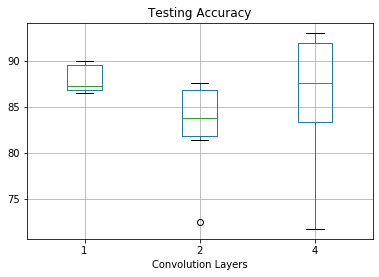

In [42]:
boxplot = df.boxplot(by='Convolution Layers', column=['Testing Accuracy'])

plt.suptitle('')
plt.show()